In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels,),(test_images, test_labels) = data.load_data()

In [4]:
train_images[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

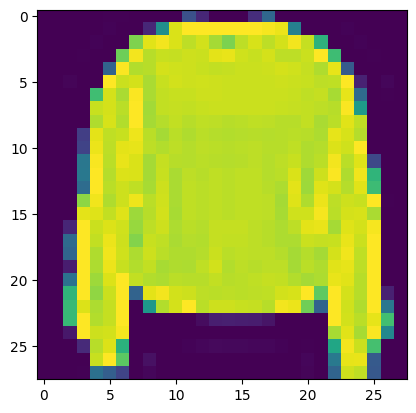

In [5]:
plt.imshow(train_images[7])

In [6]:
train_images = train_images/255
test_images = test_images/255

In [7]:
input_layer = tf.keras.layers.Flatten(input_shape=(28,28))
hidden_layer1 = tf.keras.layers.Dense(128,activation='relu')
output_layer = tf.keras.layers.Dense(10,activation='softmax')

In [8]:
model = tf.keras.Sequential([input_layer,hidden_layer1,output_layer])

2023-09-12 19:54:18.805025: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-12 19:54:18.805063: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-12 19:54:18.805075: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-12 19:54:18.805281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-12 19:54:18.805479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics='Accuracy')

In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10


2023-09-12 19:54:19.865835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.5550 - Accuracy: 0.8098
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4710 - Accuracy: 0.8373
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4649 - Accuracy: 0.8404
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4638 - Accuracy: 0.8408
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4636 - Accuracy: 0.8426
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4688 - Accuracy: 0.8415
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4753 - Accuracy: 0.8408
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4784 - Accuracy: 0.8404
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4828 - Accuracy: 0.8410
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4948 - Accurac

In [12]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

 29/313 [=>............................] - ETA: 1s - loss: 0.5170 - Accuracy: 0.8459

2023-09-12 19:55:36.134272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.5783 - Accuracy: 0.8332


In [13]:
test_loss

0.5783383250236511

In [14]:
test_acc

0.8331999778747559